In [2]:
import pandas as pd
!pip install pingouin
import pingouin as pg
from pingouin import pairwise_corr
!pip install plotly_express
import plotly_express as px
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
!pip install kmodes
!pip install plotnine
import plotly.graph_objects as go
import plotnine
from plotnine import *
from kmodes.kprototypes import KPrototypes
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

C:\Users\User\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.3.11, the latest is 0.3.12.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


In [3]:
#Importação do Dataset

In [3]:
df = pd.read_csv('censo_tecnologia_2019.csv',  sep=';', encoding='latin-1')

In [5]:
#Análise Exploratória de Dados

In [4]:
df.head()

,ano_nascimento,idade,sexo,etnia,deficiencia,autismo,asperger,ensino_medio,data_de_ingresso,status,...,municipio_do_curso,renda_per_capita,categoria_adm,acessibilidade,financiamento,fies,prouni_integral,prouni_parcial,extra_curricular,apoio_social
0,1991,28,Masculino,Aluno não quis declarar cor/raça,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JUL2015:00:00:00,Desvinculado do curso,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Sim,Não,Não
1,1992,27,Masculino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2018:00:00:00,Formado,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
2,1996,23,Masculino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2018:00:00:00,Matrícula trancada,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
3,1999,20,Masculino,Amarela,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Privada,01JAN2019:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
4,1996,23,Masculino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Privada,01JAN2015:00:00:00,Formado,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Não (Aluno possui outro tipo de financiamento),Não,Não


In [5]:
#Selecionando apenas as linhas com sexo 'Feminino'
df_fem = df[(df.sexo == ' Feminino')]
df_fem.head()

,ano_nascimento,idade,sexo,etnia,deficiencia,autismo,asperger,ensino_medio,data_de_ingresso,status,...,municipio_do_curso,renda_per_capita,categoria_adm,acessibilidade,financiamento,fies,prouni_integral,prouni_parcial,extra_curricular,apoio_social
5,1997,22,Feminino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Privada,01JAN2015:00:00:00,Formado,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Não (Aluno possui outro tipo de financiamento),Não,Não
12,2000,19,Feminino,Parda,Sim,Não (Aluno possui outro tipo de deficiência),Não (Aluno possui outro tipo de deficiência),Pública,01JAN2019:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
43,1990,29,Feminino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JUL2018:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Não,Não
51,1996,23,Feminino,Branca,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2015:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Sim,Não,Não
61,1998,21,Feminino,Aluno não quis declarar cor/raça,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Privada,01JUL2018:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não


In [8]:
df.tail(2)

,ano_nascimento,idade,sexo,etnia,deficiencia,autismo,asperger,ensino_medio,data_de_ingresso,status,...,municipio_do_curso,renda_per_capita,categoria_adm,acessibilidade,financiamento,fies,prouni_integral,prouni_parcial,extra_curricular,apoio_social
240104,1990,29,Masculino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2019:00:00:00,Cursando,...,Palmas (TO),1056,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
240105,1999,20,Masculino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2018:00:00:00,Cursando,...,Palmas (TO),1056,Privada sem fins lucrativos,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Sim,Não (Aluno possui outro tipo de financiamento),Não,Não


In [9]:
df_fem.tail(2)

,ano_nascimento,idade,sexo,etnia,deficiencia,autismo,asperger,ensino_medio,data_de_ingresso,status,...,municipio_do_curso,renda_per_capita,categoria_adm,acessibilidade,financiamento,fies,prouni_integral,prouni_parcial,extra_curricular,apoio_social
240061,1999,20,Feminino,Preta,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2019:00:00:00,Cursando,...,Palmas (TO),1056,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
240082,1999,20,Feminino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JUL2016:00:00:00,Cursando,...,Palmas (TO),1056,Privada sem fins lucrativos,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Sim,Não (Aluno possui outro tipo de financiamento),Não,Não


In [10]:
df.index

RangeIndex(start=0, stop=240106, step=1)

In [11]:
df_fem.index

Int64Index([     5,     12,     43,     51,     61,     81,     86,     87,
                89,     98,
            ...
            239994, 239998, 240027, 240030, 240045, 240046, 240050, 240058,
            240061, 240082],
           dtype='int64', length=28253)

In [12]:
df.shape

(240106, 29)

In [13]:
df_fem.shape

(28253, 29)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240106 entries, 0 to 240105
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ano_nascimento      240106 non-null  int64 
 1   idade               240106 non-null  int64 
 2   sexo                240106 non-null  object
 3   etnia               240106 non-null  object
 4   deficiencia         240106 non-null  object
 5   autismo             240106 non-null  object
 6   asperger            240106 non-null  object
 7   ensino_medio        240106 non-null  object
 8   data_de_ingresso    240106 non-null  object
 9   status              240106 non-null  object
 10  concluinte          240106 non-null  object
 11  cine_rotulo         240106 non-null  object
 12  nome_do_curso       240106 non-null  object
 13  grau_academico      240106 non-null  object
 14  tipo_de_ensino      240106 non-null  object
 15  turno               240106 non-null  object
 16  re

In [15]:
df_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28253 entries, 5 to 240082
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ano_nascimento      28253 non-null  int64 
 1   idade               28253 non-null  int64 
 2   sexo                28253 non-null  object
 3   etnia               28253 non-null  object
 4   deficiencia         28253 non-null  object
 5   autismo             28253 non-null  object
 6   asperger            28253 non-null  object
 7   ensino_medio        28253 non-null  object
 8   data_de_ingresso    28253 non-null  object
 9   status              28253 non-null  object
 10  concluinte          28253 non-null  object
 11  cine_rotulo         28253 non-null  object
 12  nome_do_curso       28253 non-null  object
 13  grau_academico      28253 non-null  object
 14  tipo_de_ensino      28253 non-null  object
 15  turno               28253 non-null  object
 16  regiao_do_curso     2

In [16]:
df.isna().sum()

ano_nascimento        0
idade                 0
sexo                  0
etnia                 0
deficiencia           0
autismo               0
asperger              0
ensino_medio          0
data_de_ingresso      0
status                0
concluinte            0
cine_rotulo           0
nome_do_curso         0
grau_academico        0
tipo_de_ensino        0
turno                 0
regiao_do_curso       0
uf                    0
estado_do_curso       0
municipio_do_curso    0
renda_per_capita      0
categoria_adm         0
acessibilidade        0
financiamento         0
fies                  0
prouni_integral       0
prouni_parcial        0
extra_curricular      0
apoio_social          0
dtype: int64

In [17]:
df.columns

Index(['ano_nascimento', 'idade', 'sexo', 'etnia', 'deficiencia', 'autismo',
       'asperger', 'ensino_medio', 'data_de_ingresso', 'status', 'concluinte',
       'cine_rotulo', 'nome_do_curso', 'grau_academico', 'tipo_de_ensino',
       'turno', 'regiao_do_curso', 'uf', 'estado_do_curso',
       'municipio_do_curso', 'renda_per_capita', 'categoria_adm',
       'acessibilidade', 'financiamento', 'fies', 'prouni_integral',
       'prouni_parcial', 'extra_curricular', 'apoio_social'],
      dtype='object')

In [18]:
#Quais dessas colunas possuem valores que podem indicar a presença de dados categóricos?
df.nunique()

ano_nascimento         63
idade                  63
sexo                    2
etnia                   7
deficiencia             3
autismo                 3
asperger                3
ensino_medio            3
data_de_ingresso       51
status                  6
concluinte              2
cine_rotulo            13
nome_do_curso          27
grau_academico          3
tipo_de_ensino          1
turno                   4
regiao_do_curso         5
uf                     27
estado_do_curso        27
municipio_do_curso    348
renda_per_capita       27
categoria_adm           4
acessibilidade          2
financiamento           2
fies                    3
prouni_integral         3
prouni_parcial          3
extra_curricular        2
apoio_social            2
dtype: int64

In [19]:
#Quais dessas colunas possuem valores que podem indicar a presença de dados categóricos?
df_fem.nunique()

ano_nascimento         52
idade                  52
sexo                    1
etnia                   7
deficiencia             3
autismo                 3
asperger                3
ensino_medio            3
data_de_ingresso       47
status                  6
concluinte              2
cine_rotulo            13
nome_do_curso          26
grau_academico          3
tipo_de_ensino          1
turno                   4
regiao_do_curso         5
uf                     27
estado_do_curso        27
municipio_do_curso    327
renda_per_capita       27
categoria_adm           4
acessibilidade          2
financiamento           2
fies                    3
prouni_integral         3
prouni_parcial          3
extra_curricular        2
apoio_social            2
dtype: int64

In [20]:
df.describe().round(2)

,ano_nascimento,idade,renda_per_capita
count,240106.000,240106.000,240106.000
mean,1994.270,24.730,1666.890
std,6.080,6.080,464.520
min,1934.000,16.000,636.000
25%,1992.000,20.000,1358.000
50%,1996.000,23.000,1882.000
75%,1999.000,27.000,1946.000
max,2003.000,85.000,2686.000


In [21]:
df_fem.describe().round(2)

,ano_nascimento,idade,renda_per_capita
count,28253.000,28253.000,28253.000
mean,1994.310,24.690,1698.480
std,6.070,6.070,450.860
min,1950.000,17.000,636.000
25%,1992.000,20.000,1358.000
50%,1996.000,23.000,1882.000
75%,1999.000,27.000,1946.000
max,2002.000,69.000,2686.000


In [22]:
#Transformando object em dados categóricos
df[['sexo', 'etnia', 'deficiencia', 'autismo',
       'asperger', 'ensino_medio', 'data_de_ingresso', 'status', 'concluinte',
       'cine_rotulo', 'nome_do_curso', 'grau_academico', 'tipo_de_ensino',
       'turno', 'regiao_do_curso', 'uf', 'estado_do_curso',
       'municipio_do_curso', 'categoria_adm',
       'acessibilidade', 'financiamento', 'fies', 'prouni_integral',
       'prouni_parcial', 'extra_curricular', 'apoio_social']]=df[['sexo', 'etnia', 'deficiencia', 'autismo',
       'asperger', 'ensino_medio', 'data_de_ingresso', 'status', 'concluinte',
       'cine_rotulo', 'nome_do_curso', 'grau_academico', 'tipo_de_ensino',
       'turno', 'regiao_do_curso', 'uf', 'estado_do_curso',
       'municipio_do_curso', 'categoria_adm',
       'acessibilidade', 'financiamento', 'fies', 'prouni_integral',
       'prouni_parcial', 'extra_curricular', 'apoio_social']].astype('category')

In [23]:
#Transformando object em dados categóricos
df_fem[['sexo', 'etnia', 'deficiencia', 'autismo',
       'asperger', 'ensino_medio', 'data_de_ingresso', 'status', 'concluinte',
       'cine_rotulo', 'nome_do_curso', 'grau_academico', 'tipo_de_ensino',
       'turno', 'regiao_do_curso', 'uf', 'estado_do_curso',
       'municipio_do_curso', 'categoria_adm',
       'acessibilidade', 'financiamento', 'fies', 'prouni_integral',
       'prouni_parcial', 'extra_curricular', 'apoio_social']]=df_fem[['sexo', 'etnia', 'deficiencia', 'autismo',
       'asperger', 'ensino_medio', 'data_de_ingresso', 'status', 'concluinte',
       'cine_rotulo', 'nome_do_curso', 'grau_academico', 'tipo_de_ensino',
       'turno', 'regiao_do_curso', 'uf', 'estado_do_curso',
       'municipio_do_curso', 'categoria_adm',
       'acessibilidade', 'financiamento', 'fies', 'prouni_integral',
       'prouni_parcial', 'extra_curricular', 'apoio_social']].astype('category')

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [24]:
#Verificando se foi bem sucedido
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240106 entries, 0 to 240105
Data columns (total 29 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   ano_nascimento      240106 non-null  int64   
 1   idade               240106 non-null  int64   
 2   sexo                240106 non-null  category
 3   etnia               240106 non-null  category
 4   deficiencia         240106 non-null  category
 5   autismo             240106 non-null  category
 6   asperger            240106 non-null  category
 7   ensino_medio        240106 non-null  category
 8   data_de_ingresso    240106 non-null  category
 9   status              240106 non-null  category
 10  concluinte          240106 non-null  category
 11  cine_rotulo         240106 non-null  category
 12  nome_do_curso       240106 non-null  category
 13  grau_academico      240106 non-null  category
 14  tipo_de_ensino      240106 non-null  category
 15  turno            

In [25]:
#Verificando se foi bem sucedido
df_fem.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28253 entries, 5 to 240082
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ano_nascimento      28253 non-null  int64   
 1   idade               28253 non-null  int64   
 2   sexo                28253 non-null  category
 3   etnia               28253 non-null  category
 4   deficiencia         28253 non-null  category
 5   autismo             28253 non-null  category
 6   asperger            28253 non-null  category
 7   ensino_medio        28253 non-null  category
 8   data_de_ingresso    28253 non-null  category
 9   status              28253 non-null  category
 10  concluinte          28253 non-null  category
 11  cine_rotulo         28253 non-null  category
 12  nome_do_curso       28253 non-null  category
 13  grau_academico      28253 non-null  category
 14  tipo_de_ensino      28253 non-null  category
 15  turno               28253 non-null 

In [26]:
df_categ= df.select_dtypes(include='category')

In [27]:
#Top de dados mais recorrentes
df_categ.describe().T

,count,unique,top,freq
sexo,240106,2,Masculino,211853
etnia,240106,7,Branca,109881
deficiencia,240106,3,Não,226406
autismo,240106,3,Aluno não possui qualquer tipo de deficiência,238619
asperger,240106,3,Aluno não possui qualquer tipo de deficiência,238619
ensino_medio,240106,3,Pública,168282
data_de_ingresso,240106,51,01JAN2019:00:00:00,48187
status,240106,6,Cursando,124567
concluinte,240106,2,Situação diferente de concluinte,216961
cine_rotulo,240106,13,Sistemas de informação,119907


In [28]:
df_fem_categ= df.select_dtypes(include='category')

In [29]:
#Top de dados mais recorrentes
df_fem_categ.describe().T

,count,unique,top,freq
sexo,240106,2,Masculino,211853
etnia,240106,7,Branca,109881
deficiencia,240106,3,Não,226406
autismo,240106,3,Aluno não possui qualquer tipo de deficiência,238619
asperger,240106,3,Aluno não possui qualquer tipo de deficiência,238619
ensino_medio,240106,3,Pública,168282
data_de_ingresso,240106,51,01JAN2019:00:00:00,48187
status,240106,6,Cursando,124567
concluinte,240106,2,Situação diferente de concluinte,216961
cine_rotulo,240106,13,Sistemas de informação,119907


In [31]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Pessoas com Deficiência', 'Não dispõe de informação', 'Pessoas sem Deficiência'],
    x=[ 1331, 10801, 119721],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Pessoas com Deficiência', 'Não dispõe de informação', 'Pessoas sem Deficiência'],
    x=[ 156, 1412, 26685],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Pessoas com deficiências no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

        
fig.update_layout(barmode='stack')
fig.show()

In [32]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Pessoas que realizam Atividades Extracurriculares', 'Pessoas que não realizam Atividades Extracurriculares'],
    x=[34218, 117635],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Pessoas que realizam Atividades Extracurriculares', 'Pessoas que não realizam Atividades Extracurriculares'],
    x=[5009, 23244],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Atividades Extracurriculares no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})
        
fig.update_layout(barmode='stack')
fig.show()

In [33]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Situação de concluinte', 'Situação diferente de concluinte'],
    x=[ 20117, 191676],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Situação de concluinte', 'Situação diferente de concluinte'],
    x=[2968, 25285],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Situação de concluinte no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top'})
        
fig.update_layout(barmode='stack')
fig.show()

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Vespertino', 'Integral', 'Matutino','Noturno'],
    x=[1750, 3129, 30803, 176171],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Vespertino', 'Integral', 'Matutino','Noturno'],
    x=[483, 204, 4864, 22702],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Turno de estudo no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.48,
        'xanchor': 'center',
        'yanchor': 'top'})
        
fig.update_layout(barmode='stack')
fig.show()

In [35]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Região Norte', 'Regiao Centro-Oeste', 'Região Nordeste', 'Região Sul', 'Região Sudeste'],
    x=[10208, 19086, 31880, 34489, 116190],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Região Norte', 'Regiao Centro-Oeste', 'Região Nordeste', 'Região Sul', 'Região Sudeste'],
    x=[1307, 2156, 3620, 4020, 17150],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Regiões de cursos do Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

        
fig.update_layout(barmode='stack')
fig.show()

In [36]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Falecido','Transferido (outro curso da mesma IES)', 'Formado', 'Matrícula trancada', 'Desvinculado do curso', 'Cursando'],
    x=[24,3627,20177, 30241, 47465, 110319],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Falecido','Transferido (outro curso da mesma IES)', 'Formado', 'Matrícula trancada', 'Desvinculado do curso', 'Cursando'],
    x=[2,575,2968, 3851, 6609, 14248],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Status de matrícula no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.55,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.update_layout(barmode='stack')
fig.show()

In [37]:
fig = go.Figure()
fig.add_trace(go.Bar(
    y=['Não dispõe da informação','Indígena','Amarela','Preta','Não quis declarar','Parda','Branca'],
    x=[293,1253,2913,12665,44147,53524,97058],
    name='Masculino',
    orientation='h',
    marker=dict(
        color='rgba(190, 192, 213, 1)',
        line=dict(color='rgba(190, 192, 213, 1)', width=3)      
              
        
    )
))
fig.add_trace(go.Bar(
    y=['Não dispõe da informação','Indígena','Amarela','Preta','Não quis declarar','Parda','Branca'],
    x=[48,169,582,1806,5424,7401,12823],
    name='Feminino',
    orientation='h',
    marker=dict(
         color='rgba(71, 58, 131, 0.8)',
        line=dict(color='rgba(71, 58, 131, 0.8)', width=3)
    )
))

fig.update_layout(
    title={
        'text': "Etnias no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

        
fig.update_layout(barmode='stack')
fig.show()

In [38]:
#Análise Explanatória

In [39]:
fig = go.Figure()       

colors = ['rgba(190, 192, 213, 1)',] * 5
colors[1] = '#34107B'

fig.add_trace(go.Bar(x=['Masculino', 'Feminino'], y=[211853, 28253],
                    marker_color=colors)) 
fig.update_layout(
    title={
        'text': "Pessoas do sexo feminino x masculino no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [10]:
fig = go.Figure(go.Bar(
            x=[48, 169, 582, 1806, 5424, 7401, 12823],
            y=['Não dispõe da informação','Indígena','Amarela','Preta','Aluno não quis declarar','Parda','Branca'],
            orientation='h',
            marker =  {'color' : '#34107B',
                              'line' : {'width': 1,
                                        'color': '#34107B'}},
                   opacity=.8)

            )

fig.update_layout(
    title={
        'text': "Etnias de mulheres no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.54,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

In [64]:
fig = go.Figure(go.Bar(
            x=[1307, 2156, 3620, 4020, 17150],
            y=['Região Norte','Região Centro-Oeste','Região Nordeste','Região Sul','Região Sudeste',],
            orientation='h',
            marker =  {'color' : '#34107B',
                              'line' : {'width': 1,
                                        'color': '#34107B'}},
                   opacity=.8)

            )

fig.update_layout(
    title={
        'text': "Regiões dos cursos de mulheres no Ensino Superior em 2019 (cursos de tecnologia)",
        'y':0.9,
        'x':0.52,
        'xanchor': 'center',
        'yanchor': 'top'})


fig.show()

In [42]:
#Clusterização

In [17]:
df_cluster = df[(df.sexo == ' Feminino')]
df_cluster.head()

,ano_nascimento,idade,sexo,etnia,deficiencia,autismo,asperger,ensino_medio,data_de_ingresso,status,...,municipio_do_curso,renda_per_capita,categoria_adm,acessibilidade,financiamento,fies,prouni_integral,prouni_parcial,extra_curricular,apoio_social
5,1997,22,Feminino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Privada,01JAN2015:00:00:00,Formado,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Não (Aluno possui outro tipo de financiamento),Não,Não
12,2000,19,Feminino,Parda,Sim,Não (Aluno possui outro tipo de deficiência),Não (Aluno possui outro tipo de deficiência),Pública,01JAN2019:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não
43,1990,29,Feminino,Parda,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JUL2018:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Não,Não
51,1996,23,Feminino,Branca,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Pública,01JAN2015:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Sim,Sim,Não (Aluno possui outro tipo de financiamento),Sim,Não,Não
61,1998,21,Feminino,Aluno não quis declarar cor/raça,Não,Aluno não possui qualquer tipo de deficiência,Aluno não possui qualquer tipo de deficiência,Privada,01JUL2018:00:00:00,Cursando,...,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Aluno não possui qualquer tipo de financiamento,Não,Não


In [44]:
#Pré-processamento: retirada de colunas que serão irrelevantes para o k-prototypes, deixando os dados mais objetivos
df_cluster.drop (['ano_nascimento', 'autismo', 'asperger', 'data_de_ingresso', 'uf', 'concluinte', 'cine_rotulo', 'regiao_do_curso', 
           'estado_do_curso', 'acessibilidade', 'fies', 'prouni_integral', 'prouni_parcial'], axis = 1, inplace = True)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [45]:
#Exibição dos dados de pré-processamento
print('Dimension data: {} rows and {} columns'.format(len(df_cluster), len(df_cluster.columns)))
df_cluster.head()

Dimension data: 28253 rows and 16 columns


,idade,sexo,etnia,deficiencia,ensino_medio,status,nome_do_curso,grau_academico,tipo_de_ensino,turno,municipio_do_curso,renda_per_capita,categoria_adm,financiamento,extra_curricular,apoio_social
5,22,Feminino,Parda,Não,Privada,Formado,SISTEMAS DE INFORMAÇÃO,Bacharelado,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Não
12,19,Feminino,Parda,Sim,Pública,Cursando,REDES DE COMPUTADORES,Tecnológico,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Não,Não,Não
43,29,Feminino,Parda,Não,Pública,Cursando,REDES DE COMPUTADORES,Tecnológico,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Não
51,23,Feminino,Branca,Não,Pública,Cursando,SISTEMAS DE INFORMAÇÃO,Bacharelado,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Não
61,21,Feminino,Aluno não quis declarar cor/raça,Não,Privada,Cursando,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Tecnológico,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Não,Não,Não


In [46]:
#Obtendo a posição de colunas categóricas
catColumnsPos = [df_cluster.columns.get_loc(col) for col in list(df_cluster.select_dtypes('category').columns)]
print('Categorical columns           : {}'.format(list(df_cluster.select_dtypes('category').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['sexo', 'etnia', 'deficiencia', 'ensino_medio', 'status', 'nome_do_curso', 'grau_academico', 'tipo_de_ensino', 'turno', 'municipio_do_curso', 'categoria_adm', 'financiamento', 'extra_curricular', 'apoio_social']
Categorical columns position  : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, 13, 14, 15]


In [47]:
#Conversão de dados categóricos para matriz
dfMatrix = df_cluster.to_numpy()
dfMatrix

array([[22, ' Feminino', ' Parda', ..., 'Sim', 'Não', 'Não'],
       [19, ' Feminino', ' Parda', ..., 'Não', 'Não', 'Não'],
       [29, ' Feminino', ' Parda', ..., 'Sim', 'Não', 'Não'],
       ...,
       [19, ' Feminino', ' Parda', ..., 'Sim', 'Sim', 'Não'],
       [20, ' Feminino', ' Preta', ..., 'Não', 'Não', 'Não'],
       [20, ' Feminino', ' Parda', ..., 'Sim', 'Não', 'Não']],
      dtype=object)

In [48]:
# Escolhendo o número de clusters pelo método de cotovelo
cost = []
for cluster in range(1, 10):
    try:
        kprototype = KPrototypes(n_jobs = -1, n_clusters = cluster, init = 'Huang', random_state = 0)
        kprototype.fit_predict(dfMatrix, categorical = catColumnsPos)
        cost.append(kprototype.cost_)
        print('Cluster initiation: {}'.format(cluster))
    except:
        break


Cluster initiation: 1
Cluster initiation: 2
Cluster initiation: 3
Cluster initiation: 4
Cluster initiation: 5
Cluster initiation: 6
Cluster initiation: 7
Cluster initiation: 8
Cluster initiation: 9


In [49]:
# Convertendo os resultados obtidos acima para um dataframe
df_cost = pd.DataFrame({'Cluster':range(1, 10), 'Cost':cost})

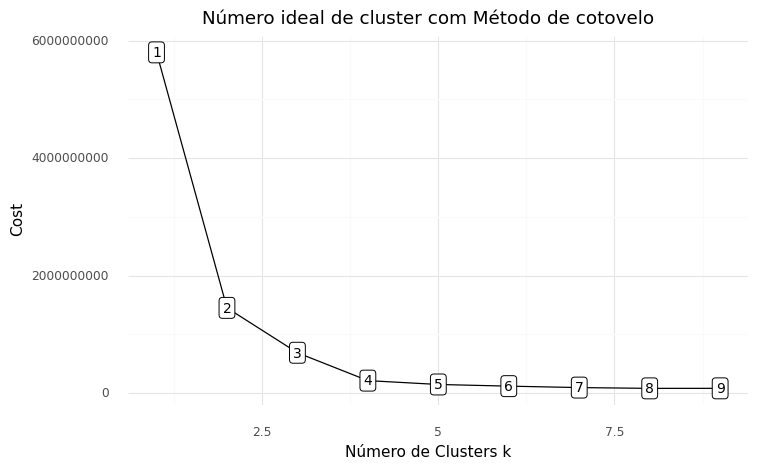

<ggplot: (99053294388)>

In [50]:
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Número ideal de cluster com Método de cotovelo')+
    xlab('Número de Clusters k')+
    ylab('Cost')+B
    theme_minimal()
)

In [51]:
# Ajustar o cluster (k=4)
kprototype = KPrototypes (n_jobs = -1, n_clusters = 4, init = 'Huang', random_state = 0) 
kprototype.fit_predict (dfMatrix, categorical = catColumnsPos)

array([1, 1, 1, ..., 1, 1, 1], dtype=uint16)

In [52]:
# Cluster centróide
kprototype.cluster_centroids_

array([['25.295817490494297', '2686.0', ' Feminino', ' Parda', 'Não',
        'Pública', 'Cursando', 'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS',
        ' Tecnológico', ' Presencial', ' Noturno', 'Brasília (DF)',
        ' Privada sem fins lucrativos', 'Não', 'Não', 'Não'],
       ['25.266693728435154', '899.3592449766592', ' Feminino', ' Parda',
        'Não', 'Pública', 'Cursando', 'SISTEMAS DE INFORMAÇÃO',
        ' Bacharelado', ' Presencial', ' Noturno', 'Fortaleza (CE)',
        ' Privada com fins lucrativos', 'Não', 'Não', 'Não'],
       ['24.487848784878487', '1429.4147164716471', ' Feminino',
        ' Branca', 'Não', 'Pública', 'Cursando',
        'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', ' Bacharelado',
        ' Presencial', ' Noturno', 'Belo Horizonte (MG)',
        ' Privada com fins lucrativos', 'Não', 'Não', 'Não'],
       ['24.533955712415324', '1916.752888939489', ' Feminino',
        ' Branca', 'Não', 'Pública', 'Cursando',
        'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS'

In [53]:
# Verificando a interação dos clusters criados
kprototype.n_iter_


5

In [54]:
# Verificando o cost dos clusters criados
kprototype.cost_

211176457.77769446

In [55]:
df_cluster['Cluster Labels'] = kprototype.labels_
df_cluster['Perfil'] = df_cluster['Cluster Labels'].map({0:'Perfil 1', 1:'Perfil 2', 2:'Perfil 3', 3:'Perfil 4'})

<ipython-input-55-b32a31fa5a24>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-55-b32a31fa5a24>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [56]:
df_cluster['Perfil'] = df_cluster['Perfil'].astype('category')
df_cluster['Perfil'] = df_cluster['Perfil'].cat.reorder_categories(['Perfil 1','Perfil 2','Perfil 3', 'Perfil 4'])

<ipython-input-56-4ce7bcd5fb0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-56-4ce7bcd5fb0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [57]:
df_cluster.head()

,idade,sexo,etnia,deficiencia,ensino_medio,status,nome_do_curso,grau_academico,tipo_de_ensino,turno,municipio_do_curso,renda_per_capita,categoria_adm,financiamento,extra_curricular,apoio_social,Cluster Labels,Perfil
5,22,Feminino,Parda,Não,Privada,Formado,SISTEMAS DE INFORMAÇÃO,Bacharelado,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Não,1,Perfil 2
12,19,Feminino,Parda,Sim,Pública,Cursando,REDES DE COMPUTADORES,Tecnológico,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Não,Não,Não,1,Perfil 2
43,29,Feminino,Parda,Não,Pública,Cursando,REDES DE COMPUTADORES,Tecnológico,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Não,1,Perfil 2
51,23,Feminino,Branca,Não,Pública,Cursando,SISTEMAS DE INFORMAÇÃO,Bacharelado,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Sim,Não,Não,1,Perfil 2
61,21,Feminino,Aluno não quis declarar cor/raça,Não,Privada,Cursando,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Tecnológico,Presencial,Noturno,Rio Branco (AC),890,Privada com fins lucrativos,Não,Não,Não,1,Perfil 2


In [58]:
df_cluster['Cluster Labels'].value_counts()

3    17567
1     4927
2     4444
0     1315
Name: Cluster Labels, dtype: int64

In [59]:
# Cluster interpretation
df_cluster.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
df_cluster.groupby('Perfil').agg(
    {
        'Total':'count',
        'idade': 'mean',
        'sexo': lambda x: x.value_counts().index[0],
        'etnia': lambda x: x.value_counts().index[0],
        'deficiencia': lambda x: x.value_counts().index[0],
        'ensino_medio': lambda x: x.value_counts().index[0],
        'status': lambda x: x.value_counts().index[0],
     	  'nome_do_curso': lambda x: x.value_counts().index[0],
        'grau_academico': lambda x: x.value_counts().index[0],
        'tipo_de_ensino': lambda x: x.value_counts().index[0],
        'turno': lambda x: x.value_counts().index[0],
        'municipio_do_curso': lambda x: x.value_counts().index[0],
        'renda_per_capita': 'mean',
        'categoria_adm': lambda x: x.value_counts().index[0],
        'financiamento': lambda x: x.value_counts().index[0],
        'extra_curricular': lambda x: x.value_counts().index[0],
        'apoio_social': lambda x: x.value_counts().index[0]
    }
).reset_index()

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Perfil,Total,idade,sexo,etnia,deficiencia,ensino_medio,status,nome_do_curso,grau_academico,tipo_de_ensino,turno,municipio_do_curso,renda_per_capita,categoria_adm,financiamento,extra_curricular,apoio_social
0,Perfil 1,1315,25.296,Feminino,Parda,Não,Pública,Cursando,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Tecnológico,Presencial,Noturno,Brasília (DF),2686.000,Privada sem fins lucrativos,Não,Não,Não
1,Perfil 2,4927,25.267,Feminino,Parda,Não,Pública,Cursando,SISTEMAS DE INFORMAÇÃO,Bacharelado,Presencial,Noturno,Fortaleza (CE),899.359,Privada com fins lucrativos,Não,Não,Não
2,Perfil 3,4444,24.488,Feminino,Branca,Não,Pública,Cursando,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Bacharelado,Presencial,Noturno,Belo Horizonte (MG),1429.415,Privada com fins lucrativos,Não,Não,Não
3,Perfil 4,17567,24.534,Feminino,Branca,Não,Pública,Cursando,ANÁLISE E DESENVOLVIMENTO DE SISTEMAS,Tecnológico,Presencial,Noturno,São Paulo (SP),1916.753,Privada com fins lucrativos,Não,Não,Não
